In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline

In [7]:
def normalize(X):
    n = X.shape[0]
    mean = np.mean(X, axis=1).reshape((n, 1))
    std = np.std(X, axis=1).reshape((n, 1))
    X_new = (X - mean) / std**2
    return X_new, mean, std

In [8]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [9]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)

In [10]:
def fwd_pass(X, params):
    W = params["W"]
    b = params["b"]
    
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    
    cache = (W, b, Z, A)
    
    return A, cache

In [33]:
def cost(A, Y):
    m = Y.shape[1]
    
    L = - Y * np.log(A) - (1 - Y) * np.log(1 - A)
    J = np.sum(L) / m
    
    return J

In [53]:
def bwd_pass(X, Y, cache):
    n, m = X.shape
    (W, b, Z, A) = cache
    
    dZ = A - Y
    dW = 1. / m * np.dot(X, dZ.T).reshape((1, n))
    db = 1. / m * np.sum(dZ)
    
    grads = {"dW" : dW, "db" : db, "dZ" : dZ}
    return grads

In [13]:
def init_params(n, m):
    W = np.random.randn(1, n) * 0.01
    b = 0
    
    params = {"W" : W, "b" : b}
    return params

In [14]:
def update_params(params, grads, learning_rate):
    W = params["W"]
    b = params["b"]
    
    dW = grads["dW"]
    db = grads["db"]
    
    params["W"] = W - learning_rate * dW
    params["b"] = b - learning_rate * db
    
    return params

In [15]:
def fit(X, Y, learning_rate = 0.01, num_iter = 30000, debug = False):
    n, m = X.shape 
    params = init_params(n, m)
    costs = []
    for i in range(num_iter):
        A, cache = fwd_pass(X, params)
        curr_cost = cost(A, Y)
        grads = bwd_pass(X, Y, cache)
        
        params = update_params(params, grads, learning_rate)
        
        if debug and i % 1000 == 0:
            print("{}-th iteration: {}".format(i, curr_cost))
            costs.append(curr_cost)
    
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("Iteration, *1000")
    plt.show()
    
    return params    

In [54]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
df = pd.read_csv("sats.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(100, 2), y=(100,)


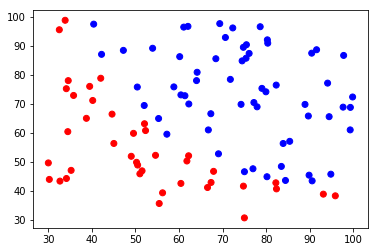

In [55]:
plot_data(X, Y)

In [56]:
Y = Y.values.reshape((df.shape[0], 1))

In [57]:
X, Y = X.T, Y.T

In [58]:
X, mean, std = normalize(X)

In [59]:
X[:,:5]

array([[-0.08275779, -0.09432804, -0.07949303, -0.01457083,  0.03571817],
       [ 0.03452427, -0.0653091 ,  0.01954037,  0.05875553,  0.02668403]])

In [60]:
Y.shape

(1, 100)

In [61]:
mean

array([[65.64427406],
       [66.22199809]])

In [62]:
std

array([[19.36068671],
       [18.48963567]])

0-th iteration: 0.6934155503145318
1000-th iteration: 0.6361908020072761
2000-th iteration: 0.6036218769419051
3000-th iteration: 0.5749708740052033
4000-th iteration: 0.5496967841554907
5000-th iteration: 0.5273247679841303
6000-th iteration: 0.5074446047505103
7000-th iteration: 0.48970563672423817
8000-th iteration: 0.47381009540123875
9000-th iteration: 0.45950603029346354
10000-th iteration: 0.4465805432271448
11000-th iteration: 0.4348536766123062
12000-th iteration: 0.42417308376289875
13000-th iteration: 0.41440948424959806
14000-th iteration: 0.4054528438261879
15000-th iteration: 0.39720919208480043
16000-th iteration: 0.389597985338788
17000-th iteration: 0.38254992718249886
18000-th iteration: 0.37600516880478935
19000-th iteration: 0.36991182215781565
20000-th iteration: 0.364224729818271
21000-th iteration: 0.3589044450551422
22000-th iteration: 0.35391638396987624
23000-th iteration: 0.34923011859479763
24000-th iteration: 0.34481878563818524
25000-th iteration: 0.340658

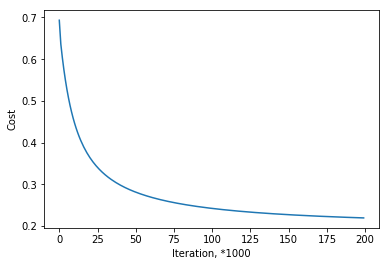

In [72]:
params = fit(X, Y, learning_rate = 0.1, num_iter = 200000, debug = True)

In [73]:
print(params)

{'W': array([[50.95760724, 44.89503461]]), 'b': 1.1463069667343895}
